In [1]:
%matplotlib inline

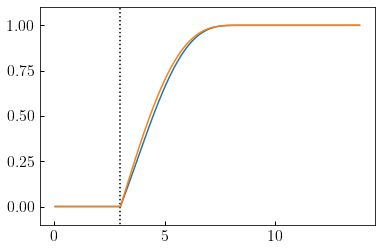

In [2]:
from alt_consumption import _half_unit_tw_cuml_kern_variable_m_w
from diffstar.gas import _gas_conversion_kern
from dsps.utils import _jax_get_dt_array

tarr = np.linspace(0.05, 13.8, 500)
dtarr = _jax_get_dt_array(tarr)
dt_const = dtarr[0]

tau_dep_max = 20.0

t_acc = 3.0
tau_dep = 5.5

cons_kern = np.array([_gas_conversion_kern(t, t_acc, dt_const, tau_dep, tau_dep_max) for t in tarr])
cuml_cons_kern = np.cumsum(cons_kern)/np.sum(cons_kern)
res = [_half_unit_tw_cuml_kern_variable_m_w(t, t_acc, tau_dep/3) for t in tarr]


fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(-0.1, 1.1)
__=ax.plot(np.zeros(500)+t_acc, np.linspace(-10, 10, 500), ':', color='k')

__=ax.plot(tarr, cuml_cons_kern)
__=ax.plot(tarr, res)


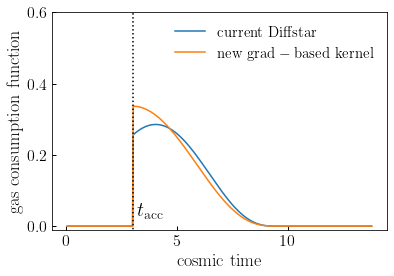

In [21]:
from alt_consumption import _tw_dmgas_dt_kern



fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(-0.01, 0.6)

t_acc = 3.0
tau_dep = 6.5

cons_kern = np.array([_gas_conversion_kern(t, t_acc, dt_const, tau_dep, tau_dep_max) for t in tarr])
res = [_tw_dmgas_dt_kern(t, t_acc, tau_dep/3) for t in tarr]

__=ax.plot(tarr, cons_kern, label=r'${\rm current\ Diffstar}$')
__=ax.plot(tarr, res, label=r'${\rm new\ grad-based\ kernel}$')
leg = ax.legend()

a, b = 3.2, 0.03
__=ax.annotate(r'$t_{\rm acc}$', xy=(a, b), xytext=(a, b), size=20)
__=ax.plot(np.zeros(500)+t_acc, np.linspace(-10, 10, 500), ':', color='k')

xlabel = ax.set_xlabel(r'${\rm cosmic\ time}$')
ylabel = ax.set_ylabel(r'${\rm gas\ consumption\ function}$')
fig.savefig('new_consumption.png', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200) 